In [3]:
import numpy as np
import pandas as pd

filename = '../data/tr_eikon_eod_data.csv'
data = pd.read_csv(filename, index_col='Date')

sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()

data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [5]:
window = 20

data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()

data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


<Axes: xlabel='Date'>

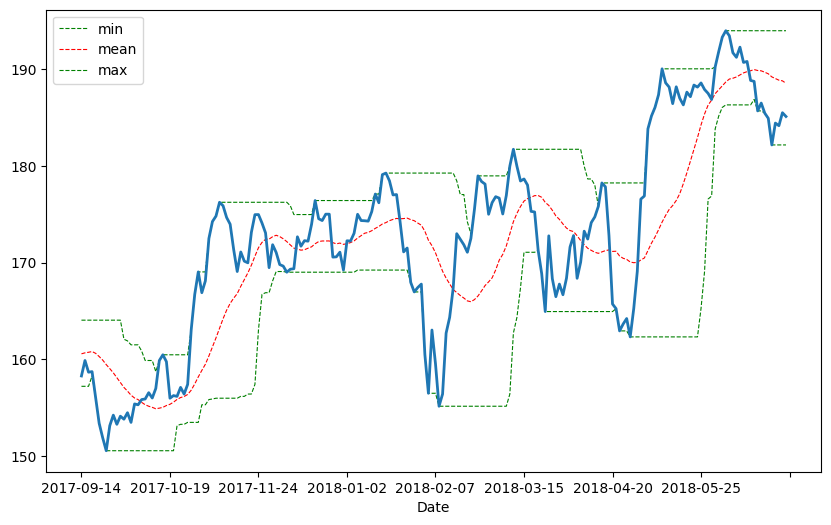

In [7]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)

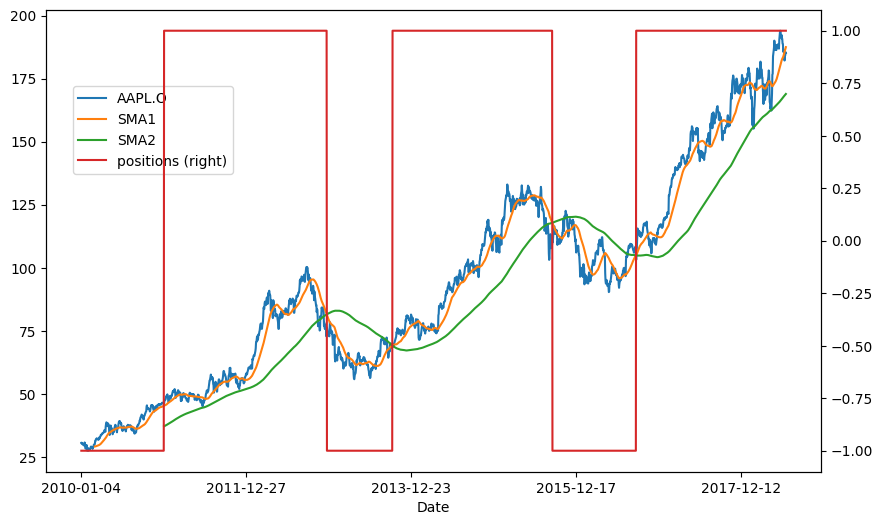

In [14]:
data['SMA1'] = data[sym].rolling(window=42).mean()  # Moving Average short-term
data['SMA2'] = data[sym].rolling(window=252).mean()  # Moving Average long-term
#data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))  # Plot the SMAs

data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  # buy/sell position based on SMA

ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
